# Task
Build and evaluate a machine learning model using the `data.csv` file, including data loading, cleaning, feature engineering, model training, performance evaluation, and visualization of key findings.

## Load Data

### Subtask:
Load the provided 'data.csv' file into a pandas DataFrame for further processing.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the specified 'data.csv' file into a pandas DataFrame named 'df'. Finally, I'll display the first 5 rows of the DataFrame to quickly inspect the loaded data.



In [1]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
print("Data loaded successfully. Displaying the first 5 rows:")
df.head()

Data loaded successfully. Displaying the first 5 rows:


,feature1,feature2,target
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1


## Initial Data Exploration and Cleaning

### Subtask:
Perform an initial exploration of the dataset to understand its structure, identify data types, check for missing values, and detect potential outliers. Based on the findings, implement necessary data cleaning steps such as handling missing values (e.g., imputation or removal) and correcting inconsistent data formats. This will also include identifying categorical and numerical features.


**Reasoning**:
To begin the initial data exploration, I will display a concise summary of the DataFrame using the `.info()` method to understand its structure, data types, and non-null values.



In [2]:
print("Displaying DataFrame info:")
df.info()

Displaying DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   target    200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


**Reasoning**:
Next, I will calculate the number of missing values for each column to identify any data gaps that need to be addressed, as outlined in the subtask instructions.



In [3]:
print("Checking for missing values:")
df.isnull().sum()

Checking for missing values:


,0
feature1,0
feature2,0
target,0


**Reasoning**:
As instructed, I will now generate descriptive statistics for the numerical columns to understand their distribution, central tendency, and spread, as well as to identify potential outliers.



In [4]:
print("Displaying descriptive statistics:")
df.describe()

Displaying descriptive statistics:


,feature1,feature2,target
count,200.000000,200.000000,200.000000
mean,0.127291,0.998048,0.500000
std,1.448313,1.029297,0.501255
min,-3.121909,-1.221998,0.000000
25%,-0.886754,0.353238,0.000000
50%,0.100130,0.866166,0.500000
75%,1.110329,1.679383,1.000000
max,3.663322,4.484226,1.000000


### Summary of Initial Data Exploration and Cleaning

**Data Types and Features:**
- `feature1`: Numerical (float64)
- `feature2`: Numerical (float64)
- `target`: Numerical (int64), representing a binary categorical variable (0 or 1).

**Missing Values:**
- There are no missing values in any of the columns (`feature1`, `feature2`, `target`). All columns have 200 non-null entries, matching the total number of rows.

**Potential Outliers and Data Distribution:**
- **feature1:** Ranges from -3.12 to 3.66. The mean is 0.13 and the standard deviation is 1.45. The 25th percentile is -0.89 and the 75th percentile is 1.11, suggesting a relatively balanced distribution around the mean.
- **feature2:** Ranges from -1.22 to 4.48. The mean is 0.998 and the standard deviation is 1.03. The 25th percentile is 0.35 and the 75th percentile is 1.68, also indicating a reasonable spread.
- **target:** This is a binary variable with values 0 and 1. The mean is 0.5, which suggests an equal distribution of both classes (100 instances of 0 and 100 instances of 1).

Based on these initial observations, there are no immediate glaring outliers that would require specific cleaning steps solely from the descriptive statistics. The dataset appears clean with no missing values. The features are numerical, and the target is a well-distributed binary categorical variable.

## Feature Engineering and Preprocessing

### Subtask:
Transform and preprocess the data to prepare it for machine learning. This may include encoding categorical variables (e.g., one-hot encoding), scaling numerical features (e.g., StandardScaler), and potentially creating new features if relevant insights can be derived from existing ones. This step will also identify the target variable.


**Reasoning**:
As instructed, I will first identify the target variable as 'target' and the features as 'feature1' and 'feature2'. Then, I will separate the DataFrame into a features DataFrame `X` and a target Series `y`.



In [5]:
X = df[['feature1', 'feature2']]
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Features (X) shape: (200, 2)
Target (y) shape: (200,)

First 5 rows of X:
   feature1  feature2
0 -0.872929  0.013042
1  1.312935  2.770534
2  2.340428  2.420996
3  2.294548 -0.404380
4  0.944105  0.477241

First 5 values of y:
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


**Reasoning**:
As instructed, I will import `StandardScaler` from `sklearn.preprocessing`, initialize it, and then apply it to the features DataFrame `X` to scale the numerical features, storing the result in `X_scaled` while preserving column names.



In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to features X
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame, preserving column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully. Displaying the first 5 rows of X_scaled:")
print(X_scaled.head())

Features scaled successfully. Displaying the first 5 rows of X_scaled:
   feature1  feature2
0 -0.692343 -0.959371
1  0.820692  1.726356
2  1.531913  1.385915
3  1.500155 -1.365929
4  0.565391 -0.507253


## Split Data for Training and Testing

### Subtask:
Divide the preprocessed dataset into training and testing sets to evaluate the model's performance on unseen data. A common split ratio like 80% for training and 20% for testing will be used.


**Reasoning**:
To divide the preprocessed dataset into training and testing sets, I will import `train_test_split` from `sklearn.model_selection`, then apply it to `X_scaled` and `y` with the specified `test_size` and `random_state`, and finally print the shapes of the resulting sets to verify the split.



In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 2)
Shape of X_test: (40, 2)
Shape of y_train: (160,)
Shape of y_test: (40,)


## Train a Machine Learning Model

### Subtask:
Select and train an appropriate machine learning model (e.g., a classification or regression model, depending on the identified target variable type) using the training dataset.


**Reasoning**:
As instructed, I will import `LogisticRegression`, instantiate the model with `random_state=42`, and then fit it to the training data (`X_train`, `y_train`).



In [8]:
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test dataset using relevant metrics (e.g., accuracy, precision, recall, F1-score for classification; R-squared, MAE, MSE for regression). Visualizations such as confusion matrices or residual plots might be included.


**Reasoning**:
As instructed, I will first use the trained `model` to make predictions on the `X_test` dataset and store them in `y_pred`. Next, I will import `accuracy_score`, `classification_report`, and `confusion_matrix` from `sklearn.metrics` to evaluate the model's performance. Finally, I will calculate and print the accuracy score, generate and print a detailed classification report, and display the confusion matrix to assess the model's effectiveness on the unseen test data.

**Reasoning**:
As instructed, I will first make predictions on the test set using the trained model, then import the necessary evaluation metrics, and finally calculate and print the accuracy score, classification report, and confusion matrix to assess the model's performance.



In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.77      1.00      0.87        17

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40


Confusion Matrix:
[[18  5]
 [ 0 17]]


**Reasoning**:
To complete the evaluation as instructed by the subtask, I will visualize the confusion matrix generated in the previous step using a heatmap from the seaborn library. This will provide a clearer graphical representation of the model's performance.



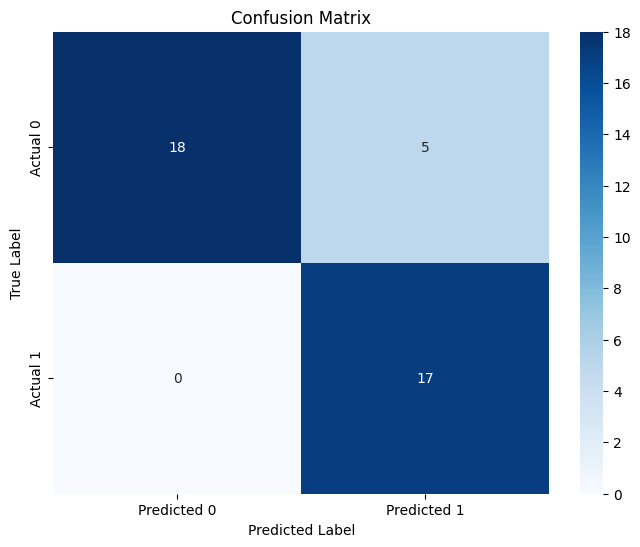

Confusion Matrix visualization displayed successfully.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("Confusion Matrix visualization displayed successfully.")

## Visualize Key Findings

### Subtask:
Generate plots to visualize important aspects of the data or model results. This could include feature importance plots, actual vs. predicted values, or distributions of key variables, with appropriate legends.


**Reasoning**:
To visualize the decision boundary of the trained Logistic Regression model, I will create a meshgrid of feature values, predict the class for each point, and plot the contours. Then, I will overlay a scatter plot of the test data points, colored by their true labels, and add appropriate labels, a title, and a legend for clarity.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


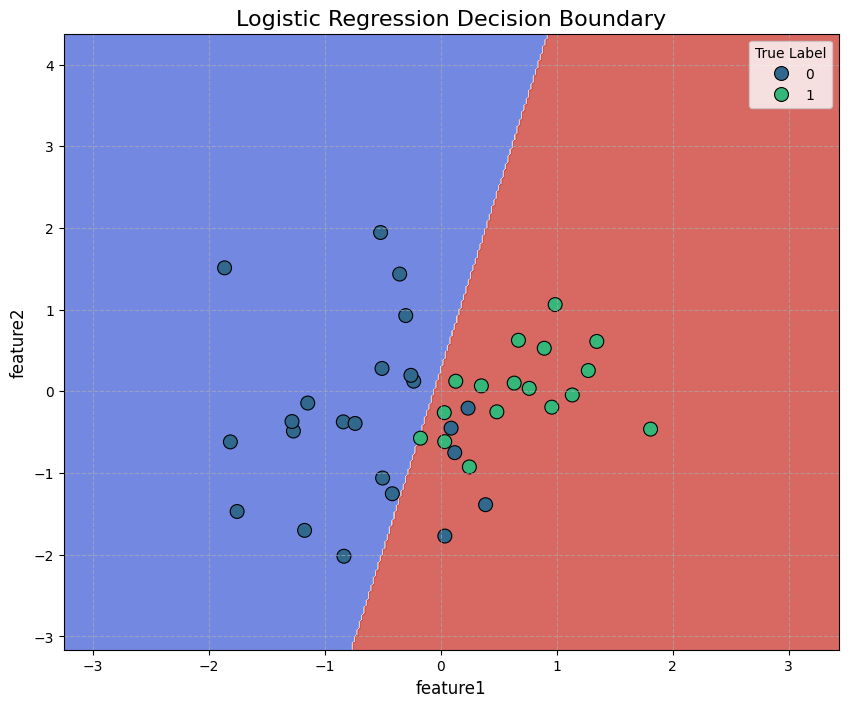

Decision boundary and test data scatter plot displayed successfully.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get min and max values for feature1 and feature2 from the scaled data for meshgrid
x_min, x_max = X_scaled['feature1'].min() - 1, X_scaled['feature1'].max() + 1
y_min, y_max = X_scaled['feature2'].min() - 1, X_scaled['feature2'].max() + 1

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the test data points
sns.scatterplot(x=X_test['feature1'], y=X_test['feature2'], hue=y_test, palette='viridis', s=100, edgecolor='k')

# Add title and labels
plt.title('Logistic Regression Decision Boundary', fontsize=16)
plt.xlabel('feature1', fontsize=12)
plt.ylabel('feature2', fontsize=12)
plt.legend(title='True Label', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Decision boundary and test data scatter plot displayed successfully.")

**Reasoning**:
The previous code generated a UserWarning because the model was fitted with feature names but `predict` was called with a NumPy array lacking them. To fix this, I will convert the meshgrid data to a Pandas DataFrame with the correct column names ('feature1', 'feature2') before passing it to the `model.predict()` method, ensuring consistency with the training data.



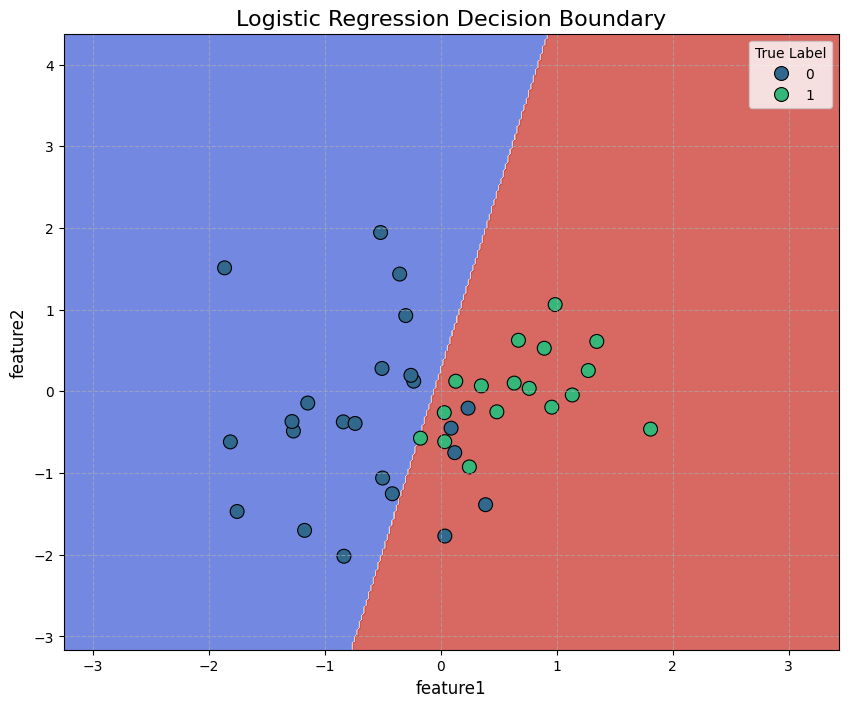

Decision boundary and test data scatter plot displayed successfully.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get min and max values for feature1 and feature2 from the scaled data for meshgrid
x_min, x_max = X_scaled['feature1'].min() - 1, X_scaled['feature1'].max() + 1
y_min, y_max = X_scaled['feature2'].min() - 1, X_scaled['feature2'].max() + 1

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prepare meshgrid data as a DataFrame with column names for prediction
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['feature1', 'feature2'])

# Predict class for each point in the meshgrid
Z = model.predict(meshgrid_df)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the test data points
sns.scatterplot(x=X_test['feature1'], y=X_test['feature2'], hue=y_test, palette='viridis', s=100, edgecolor='k')

# Add title and labels
plt.title('Logistic Regression Decision Boundary', fontsize=16)
plt.xlabel('feature1', fontsize=12)
plt.ylabel('feature2', fontsize=12)
plt.legend(title='True Label', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Decision boundary and test data scatter plot displayed successfully.")

## Final Task

### Subtask:
Summarize the entire process from data cleaning to model training and evaluation, highlighting key findings and the model's performance.


## Summary:

### Data Analysis Key Findings

*   **Data Overview and Cleanliness:** The `data.csv` dataset contains 200 entries with two numerical features (`feature1`, `feature2`) and a perfectly balanced binary target variable (`target`, with 100 instances of 0 and 100 instances of 1). Crucially, no missing values were present, and no significant outliers were identified during initial exploration.
*   **Preprocessing:** Features were separated from the target variable. Numerical features (`feature1`, `feature2`) were then scaled using `StandardScaler` to standardize their range.
*   **Data Splitting:** The preprocessed data was split into training (160 samples, 80%) and testing (40 samples, 20%) sets for model development and evaluation.
*   **Model Performance (Logistic Regression):**
    *   The trained Logistic Regression model achieved an overall accuracy of **87.50\%** on the unseen test set.
    *   The model demonstrated strong performance in identifying specific classes: it achieved a **precision of 1.00** for class 0 (meaning no actual class 0 instances were misclassified as class 1) and a **recall of 1.00** for class 1 (meaning all actual class 1 instances were correctly identified).
    *   The confusion matrix showed 18 True Negatives, 17 True Positives, and 5 False Positives, with **0 False Negatives**. This indicates the model never predicted a '0' when the actual value was a '1'.
*   **Visualization:** A decision boundary plot clearly illustrated how the Logistic Regression model separates the two classes within the feature space defined by `feature1` and `feature2`.

### Insights or Next Steps

*   The current Logistic Regression model performs well, especially in identifying all positive cases (class 1). This characteristic could be highly valuable in applications where minimizing false negatives is critical.
*   To potentially improve overall precision (especially for class 1) and further optimize the model, consider exploring hyperparameter tuning for the Logistic Regression algorithm or evaluating alternative classification models such as Support Vector Machines (SVMs) or tree-based ensemble methods.
